In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.svm import SVC
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [13]:
df= pd.read_csv('df_pre.csv')

In [14]:
column=['SexuponOutcome','DateTime','Color','DayuponOutcome','Name','Breed','Group','Size','AnimalType','BreedMix']

df_X = pd.DataFrame(data = df , columns = column)

df_y = pd.DataFrame(data = df , columns = ['OutcomeType'])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0 , shuffle = True)

In [15]:
df_y.groupby(['OutcomeType']).count()

""
OutcomeType
0
1
2
3
4


In [22]:
print(X_train.shape, type(X_train))
print(y_train.shape, type(y_train))
print(X_test.shape, type(X_test))
print(y_test.shape, type(y_test))

(21383, 10) <class 'pandas.core.frame.DataFrame'>
(21383, 1) <class 'pandas.core.frame.DataFrame'>
(5346, 10) <class 'pandas.core.frame.DataFrame'>
(5346, 1) <class 'pandas.core.frame.DataFrame'>


In [24]:
X_train[column] = X_train[column].astype(float)
X_test[column] = X_test[column].astype(float)

In [25]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)
Y_train

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [36]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [45]:
model = Sequential()
model.add(Dense(20, input_dim=10, activation="sigmoid"))
model.add(Dense(5, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error', metrics=["accuracy"])

In [47]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=1000, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 21383 samples, validate on 5346 samples
Epoch 1/1000
0s - loss: 0.1355 - acc: 0.4041 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 2/1000
0s - loss: 0.1355 - acc: 0.4033 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 3/1000
0s - loss: 0.1355 - acc: 0.4028 - val_loss: 0.1355 - val_acc: 0.4022
Epoch 4/1000
0s - loss: 0.1355 - acc: 0.4040 - val_loss: 0.1355 - val_acc: 0.4022
Epoch 5/1000
0s - loss: 0.1355 - acc: 0.4039 - val_loss: 0.1358 - val_acc: 0.4035
Epoch 6/1000
0s - loss: 0.1355 - acc: 0.4034 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 7/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1355 - val_acc: 0.4033
Epoch 8/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1358 - val_acc: 0.4035
Epoch 9/1000
0s - loss: 0.1355 - acc: 0.4025 - val_loss: 0.1355 - val_acc: 0.4033
Epoch 10/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1355 - val_acc: 0.4033
Epoch 11/1000
0s - loss: 0.1355 - acc: 0.4037 - val_loss: 0.1355 - val_acc: 0.4022
Epoch 12/1000
0s - loss: 0.1355 - acc: 0.4039 -

0s - loss: 0.1355 - acc: 0.4037 - val_loss: 0.1356 - val_acc: 0.4037
Epoch 101/1000
0s - loss: 0.1355 - acc: 0.4040 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 102/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 103/1000
0s - loss: 0.1355 - acc: 0.4040 - val_loss: 0.1356 - val_acc: 0.4037
Epoch 104/1000
0s - loss: 0.1355 - acc: 0.4040 - val_loss: 0.1355 - val_acc: 0.4039
Epoch 105/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 106/1000
0s - loss: 0.1355 - acc: 0.4031 - val_loss: 0.1355 - val_acc: 0.4044
Epoch 107/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 108/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1356 - val_acc: 0.4035
Epoch 109/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 110/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 111/1000
0s - loss: 0.1355 - acc: 0.4022 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 1

0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 199/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 200/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1355 - val_acc: 0.4039
Epoch 201/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1355 - val_acc: 0.4039
Epoch 202/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1354 - val_acc: 0.4042
Epoch 203/1000
0s - loss: 0.1355 - acc: 0.4035 - val_loss: 0.1356 - val_acc: 0.4037
Epoch 204/1000
0s - loss: 0.1354 - acc: 0.4028 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 205/1000
0s - loss: 0.1355 - acc: 0.4040 - val_loss: 0.1356 - val_acc: 0.4033
Epoch 206/1000
0s - loss: 0.1355 - acc: 0.4040 - val_loss: 0.1356 - val_acc: 0.4035
Epoch 207/1000
0s - loss: 0.1355 - acc: 0.4034 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 208/1000
0s - loss: 0.1355 - acc: 0.4016 - val_loss: 0.1358 - val_acc: 0.4037
Epoch 209/1000
0s - loss: 0.1355 - acc: 0.4036 - val_loss: 0.1355 - val_acc: 0.4037
Epoch 2

0s - loss: 0.1355 - acc: 0.4032 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 297/1000
0s - loss: 0.1355 - acc: 0.4033 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 298/1000
0s - loss: 0.1355 - acc: 0.4033 - val_loss: 0.1354 - val_acc: 0.4035
Epoch 299/1000
0s - loss: 0.1355 - acc: 0.4033 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 300/1000
0s - loss: 0.1355 - acc: 0.4033 - val_loss: 0.1354 - val_acc: 0.4035
Epoch 301/1000
0s - loss: 0.1355 - acc: 0.4033 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 302/1000
0s - loss: 0.1355 - acc: 0.4030 - val_loss: 0.1354 - val_acc: 0.4035
Epoch 303/1000
0s - loss: 0.1354 - acc: 0.4032 - val_loss: 0.1354 - val_acc: 0.4035
Epoch 304/1000
0s - loss: 0.1354 - acc: 0.4031 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 305/1000
0s - loss: 0.1354 - acc: 0.4030 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 306/1000
0s - loss: 0.1354 - acc: 0.4033 - val_loss: 0.1355 - val_acc: 0.4035
Epoch 307/1000
0s - loss: 0.1354 - acc: 0.4033 - val_loss: 0.1354 - val_acc: 0.4035
Epoch 3

0s - loss: 0.1351 - acc: 0.4058 - val_loss: 0.1348 - val_acc: 0.4106
Epoch 395/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 396/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 397/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 398/1000
0s - loss: 0.1351 - acc: 0.4057 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 399/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 400/1000
0s - loss: 0.1351 - acc: 0.4056 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 401/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1349 - val_acc: 0.4106
Epoch 402/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 403/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 404/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 405/1000
0s - loss: 0.1352 - acc: 0.4063 - val_loss: 0.1348 - val_acc: 0.4106
Epoch 4

0s - loss: 0.1351 - acc: 0.4062 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 493/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 494/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 495/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 496/1000
0s - loss: 0.1351 - acc: 0.4054 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 497/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1348 - val_acc: 0.4108
Epoch 498/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 499/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1348 - val_acc: 0.4108
Epoch 500/1000
0s - loss: 0.1351 - acc: 0.4056 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 501/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 502/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 503/1000
0s - loss: 0.1351 - acc: 0.4054 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 5

0s - loss: 0.1350 - acc: 0.4062 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 591/1000
0s - loss: 0.1350 - acc: 0.4062 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 592/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 593/1000
0s - loss: 0.1350 - acc: 0.4061 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 594/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 595/1000
0s - loss: 0.1350 - acc: 0.4062 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 596/1000
0s - loss: 0.1350 - acc: 0.4062 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 597/1000
0s - loss: 0.1350 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 598/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 599/1000
0s - loss: 0.1348 - acc: 0.4062 - val_loss: 0.1348 - val_acc: 0.4106
Epoch 600/1000
0s - loss: 0.1350 - acc: 0.4061 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 601/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 6

0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 689/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 690/1000
0s - loss: 0.1351 - acc: 0.4052 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 691/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 692/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 693/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 694/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 695/1000
0s - loss: 0.1351 - acc: 0.4059 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 696/1000
0s - loss: 0.1350 - acc: 0.4060 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 697/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 698/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 699/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1348 - val_acc: 0.4106
Epoch 7

0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 787/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 788/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 789/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 790/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 791/1000
0s - loss: 0.1350 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 792/1000
0s - loss: 0.1351 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 793/1000
0s - loss: 0.1350 - acc: 0.4057 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 794/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 795/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 796/1000
0s - loss: 0.1350 - acc: 0.4060 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 797/1000
0s - loss: 0.1351 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 7

0s - loss: 0.1350 - acc: 0.4063 - val_loss: 0.1348 - val_acc: 0.3672
Epoch 885/1000
0s - loss: 0.1350 - acc: 0.4059 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 886/1000
0s - loss: 0.1350 - acc: 0.4065 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 887/1000
0s - loss: 0.1350 - acc: 0.4065 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 888/1000
0s - loss: 0.1350 - acc: 0.4056 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 889/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 890/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1348 - val_acc: 0.4106
Epoch 891/1000
0s - loss: 0.1350 - acc: 0.4056 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 892/1000
0s - loss: 0.1350 - acc: 0.4062 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 893/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 894/1000
0s - loss: 0.1350 - acc: 0.4064 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 895/1000
0s - loss: 0.1350 - acc: 0.4065 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 8

0s - loss: 0.1348 - acc: 0.4063 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 983/1000
0s - loss: 0.1349 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 984/1000
0s - loss: 0.1349 - acc: 0.4064 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 985/1000
0s - loss: 0.1349 - acc: 0.4064 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 986/1000
0s - loss: 0.1349 - acc: 0.4063 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 987/1000
0s - loss: 0.1349 - acc: 0.4064 - val_loss: 0.1346 - val_acc: 0.4106
Epoch 988/1000
0s - loss: 0.1349 - acc: 0.4064 - val_loss: 0.1347 - val_acc: 0.4106
Epoch 989/1000
0s - loss: 0.1349 - acc: 0.4060 - val_loss: 0.1345 - val_acc: 0.4106
Epoch 990/1000
0s - loss: 0.1339 - acc: 0.4062 - val_loss: 0.1316 - val_acc: 0.4108
Epoch 991/1000
0s - loss: 0.1333 - acc: 0.4096 - val_loss: 0.1338 - val_acc: 0.4106
Epoch 992/1000
0s - loss: 0.1344 - acc: 0.4136 - val_loss: 0.1334 - val_acc: 0.4198
Epoch 993/1000
0s - loss: 0.1342 - acc: 0.4142 - val_loss: 0.1337 - val_acc: 0.4171
Epoch 9

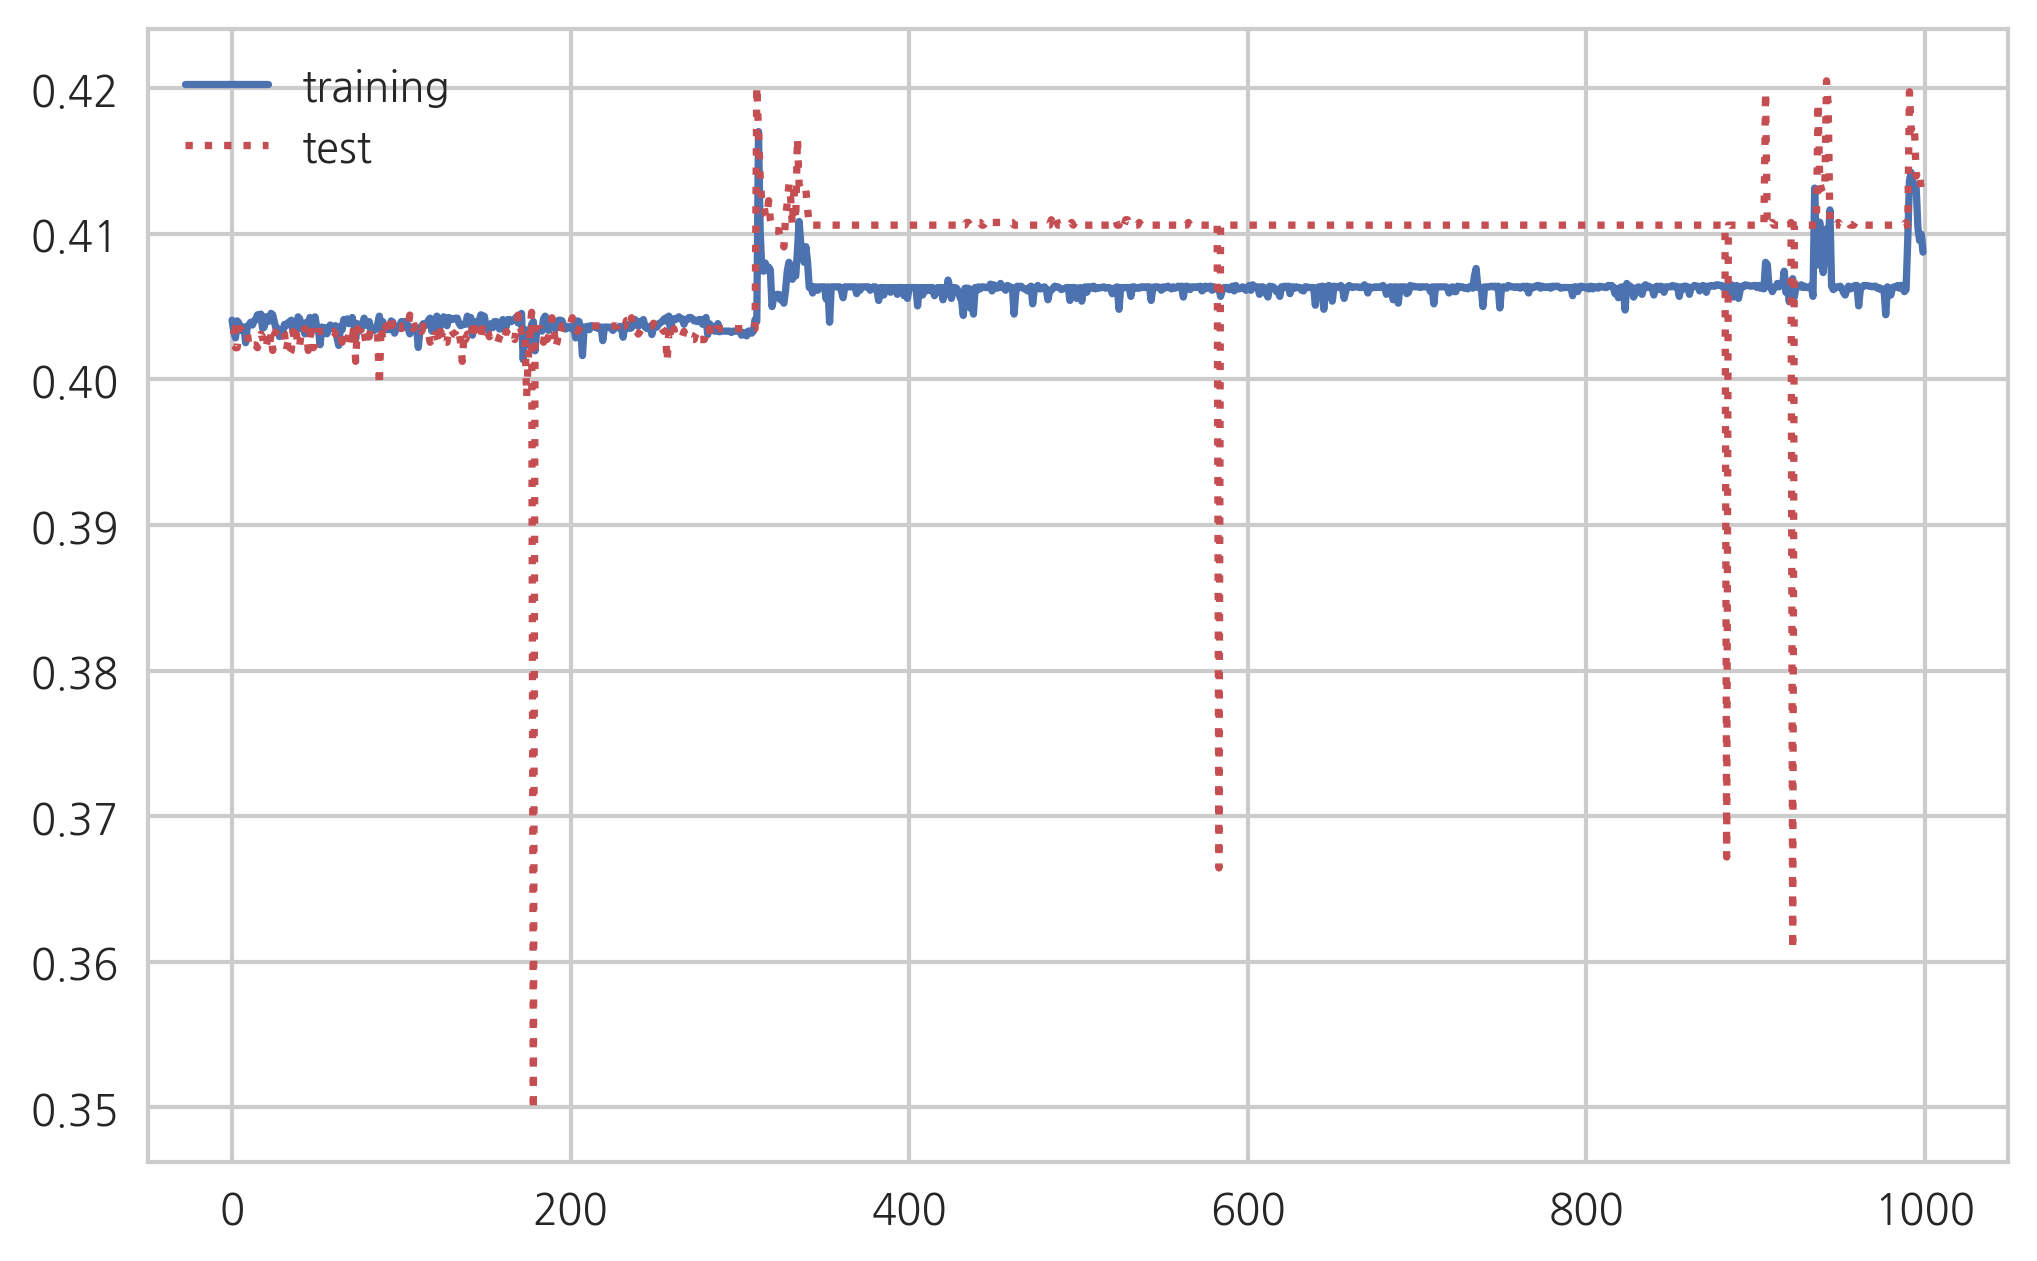

In [48]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()